# ***Random Forest***:

### Load the dataset

In [1]:
#importing libraries
import pandas as pd
from sklearn import preprocessing 
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split,GridSearchCV
import joblib
from sklearn.metrics import f1_score
%matplotlib inline

In [2]:
dataset =pd.read_csv('Loan_default.csv')

## Examining the columns and their data types

In [3]:
dataset.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [4]:
#getting whole dataset information:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [5]:
#dropping the non required columns from the dataset
dataset=dataset.drop(['LoanID'],axis=1)

In [6]:
#finding number of unique values in each column
print(dataset.nunique())

Age                   52
Income            114620
LoanAmount        158729
CreditScore          550
MonthsEmployed       120
NumCreditLines         4
InterestRate        2301
LoanTerm               5
DTIRatio              81
Education              4
EmploymentType         4
MaritalStatus          3
HasMortgage            2
HasDependents          2
LoanPurpose            5
HasCoSigner            2
Default                2
dtype: int64


In [7]:
dataset.apply(preprocessing.LabelEncoder().fit_transform)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,38,60221,29657,220,80,3,1323,2,34,0,0,0,1,1,4,1,0
1,51,30083,77402,158,15,0,281,4,58,2,0,1,0,0,4,1,0
2,28,58702,80425,151,26,2,1917,1,21,2,3,0,1,1,0,0,1
3,14,14248,25896,443,0,2,507,1,13,1,0,1,0,0,1,0,0
4,42,4654,2703,333,8,3,451,3,63,0,3,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,1,19541,133110,241,109,3,1211,0,75,0,0,1,0,0,4,0,0
255343,14,31381,119655,211,14,1,955,1,11,1,1,0,0,0,3,0,1
255344,38,59224,131545,297,70,2,329,4,40,1,2,1,1,1,0,1,0
255345,24,59474,36119,509,40,0,1890,3,34,1,1,2,1,1,4,0,0


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Age             255347 non-null  int64  
 1   Income          255347 non-null  int64  
 2   LoanAmount      255347 non-null  int64  
 3   CreditScore     255347 non-null  int64  
 4   MonthsEmployed  255347 non-null  int64  
 5   NumCreditLines  255347 non-null  int64  
 6   InterestRate    255347 non-null  float64
 7   LoanTerm        255347 non-null  int64  
 8   DTIRatio        255347 non-null  float64
 9   Education       255347 non-null  object 
 10  EmploymentType  255347 non-null  object 
 11  MaritalStatus   255347 non-null  object 
 12  HasMortgage     255347 non-null  object 
 13  HasDependents   255347 non-null  object 
 14  LoanPurpose     255347 non-null  object 
 15  HasCoSigner     255347 non-null  object 
 16  Default         255347 non-null  int64  
dtypes: float64

In [9]:
#target column analysis
dataset['Default'].unique()

array([0, 1], dtype=int64)

## Checking and handling missing values

In [10]:
missing_info =dataset.isnull().sum()
print(missing_info)

Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64


In [11]:
print('0 columns have missing values in the data.')

0 columns have missing values in the data.


## Checking of outliers and Removing Them:

In [12]:
dataset.describe() #getting statistical information of the dataset

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [13]:
dataset.shape

(255347, 17)

In [14]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'dataset' is your DataFrame
le = LabelEncoder()

# Loop over the categorical columns
for column in ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']:
    # Transform the categorical column
    dataset[column] = le.fit_transform(dataset[column])

# Now you can compute the correlation matrix
corr_matrix = dataset.corr()
print(corr_matrix)


                     Age    Income  LoanAmount  CreditScore  MonthsEmployed  \
Age             1.000000 -0.001244   -0.002213    -0.000548       -0.000341   
Income         -0.001244  1.000000   -0.000865    -0.001430        0.002675   
LoanAmount     -0.002213 -0.000865    1.000000     0.001261        0.002817   
CreditScore    -0.000548 -0.001430    0.001261     1.000000        0.000613   
MonthsEmployed -0.000341  0.002675    0.002817     0.000613        1.000000   
NumCreditLines -0.000890 -0.002016    0.000794     0.000016        0.001267   
InterestRate   -0.001127 -0.002303   -0.002291     0.000436        0.000096   
LoanTerm        0.000263 -0.000998    0.002538     0.001130       -0.001166   
DTIRatio       -0.004689  0.000205    0.001122    -0.001039        0.001765   
Education      -0.000882 -0.000965    0.002551     0.000214       -0.001304   
EmploymentType  0.000787 -0.005146    0.003060     0.003503        0.000564   
MaritalStatus  -0.002187  0.000637   -0.000771    -0

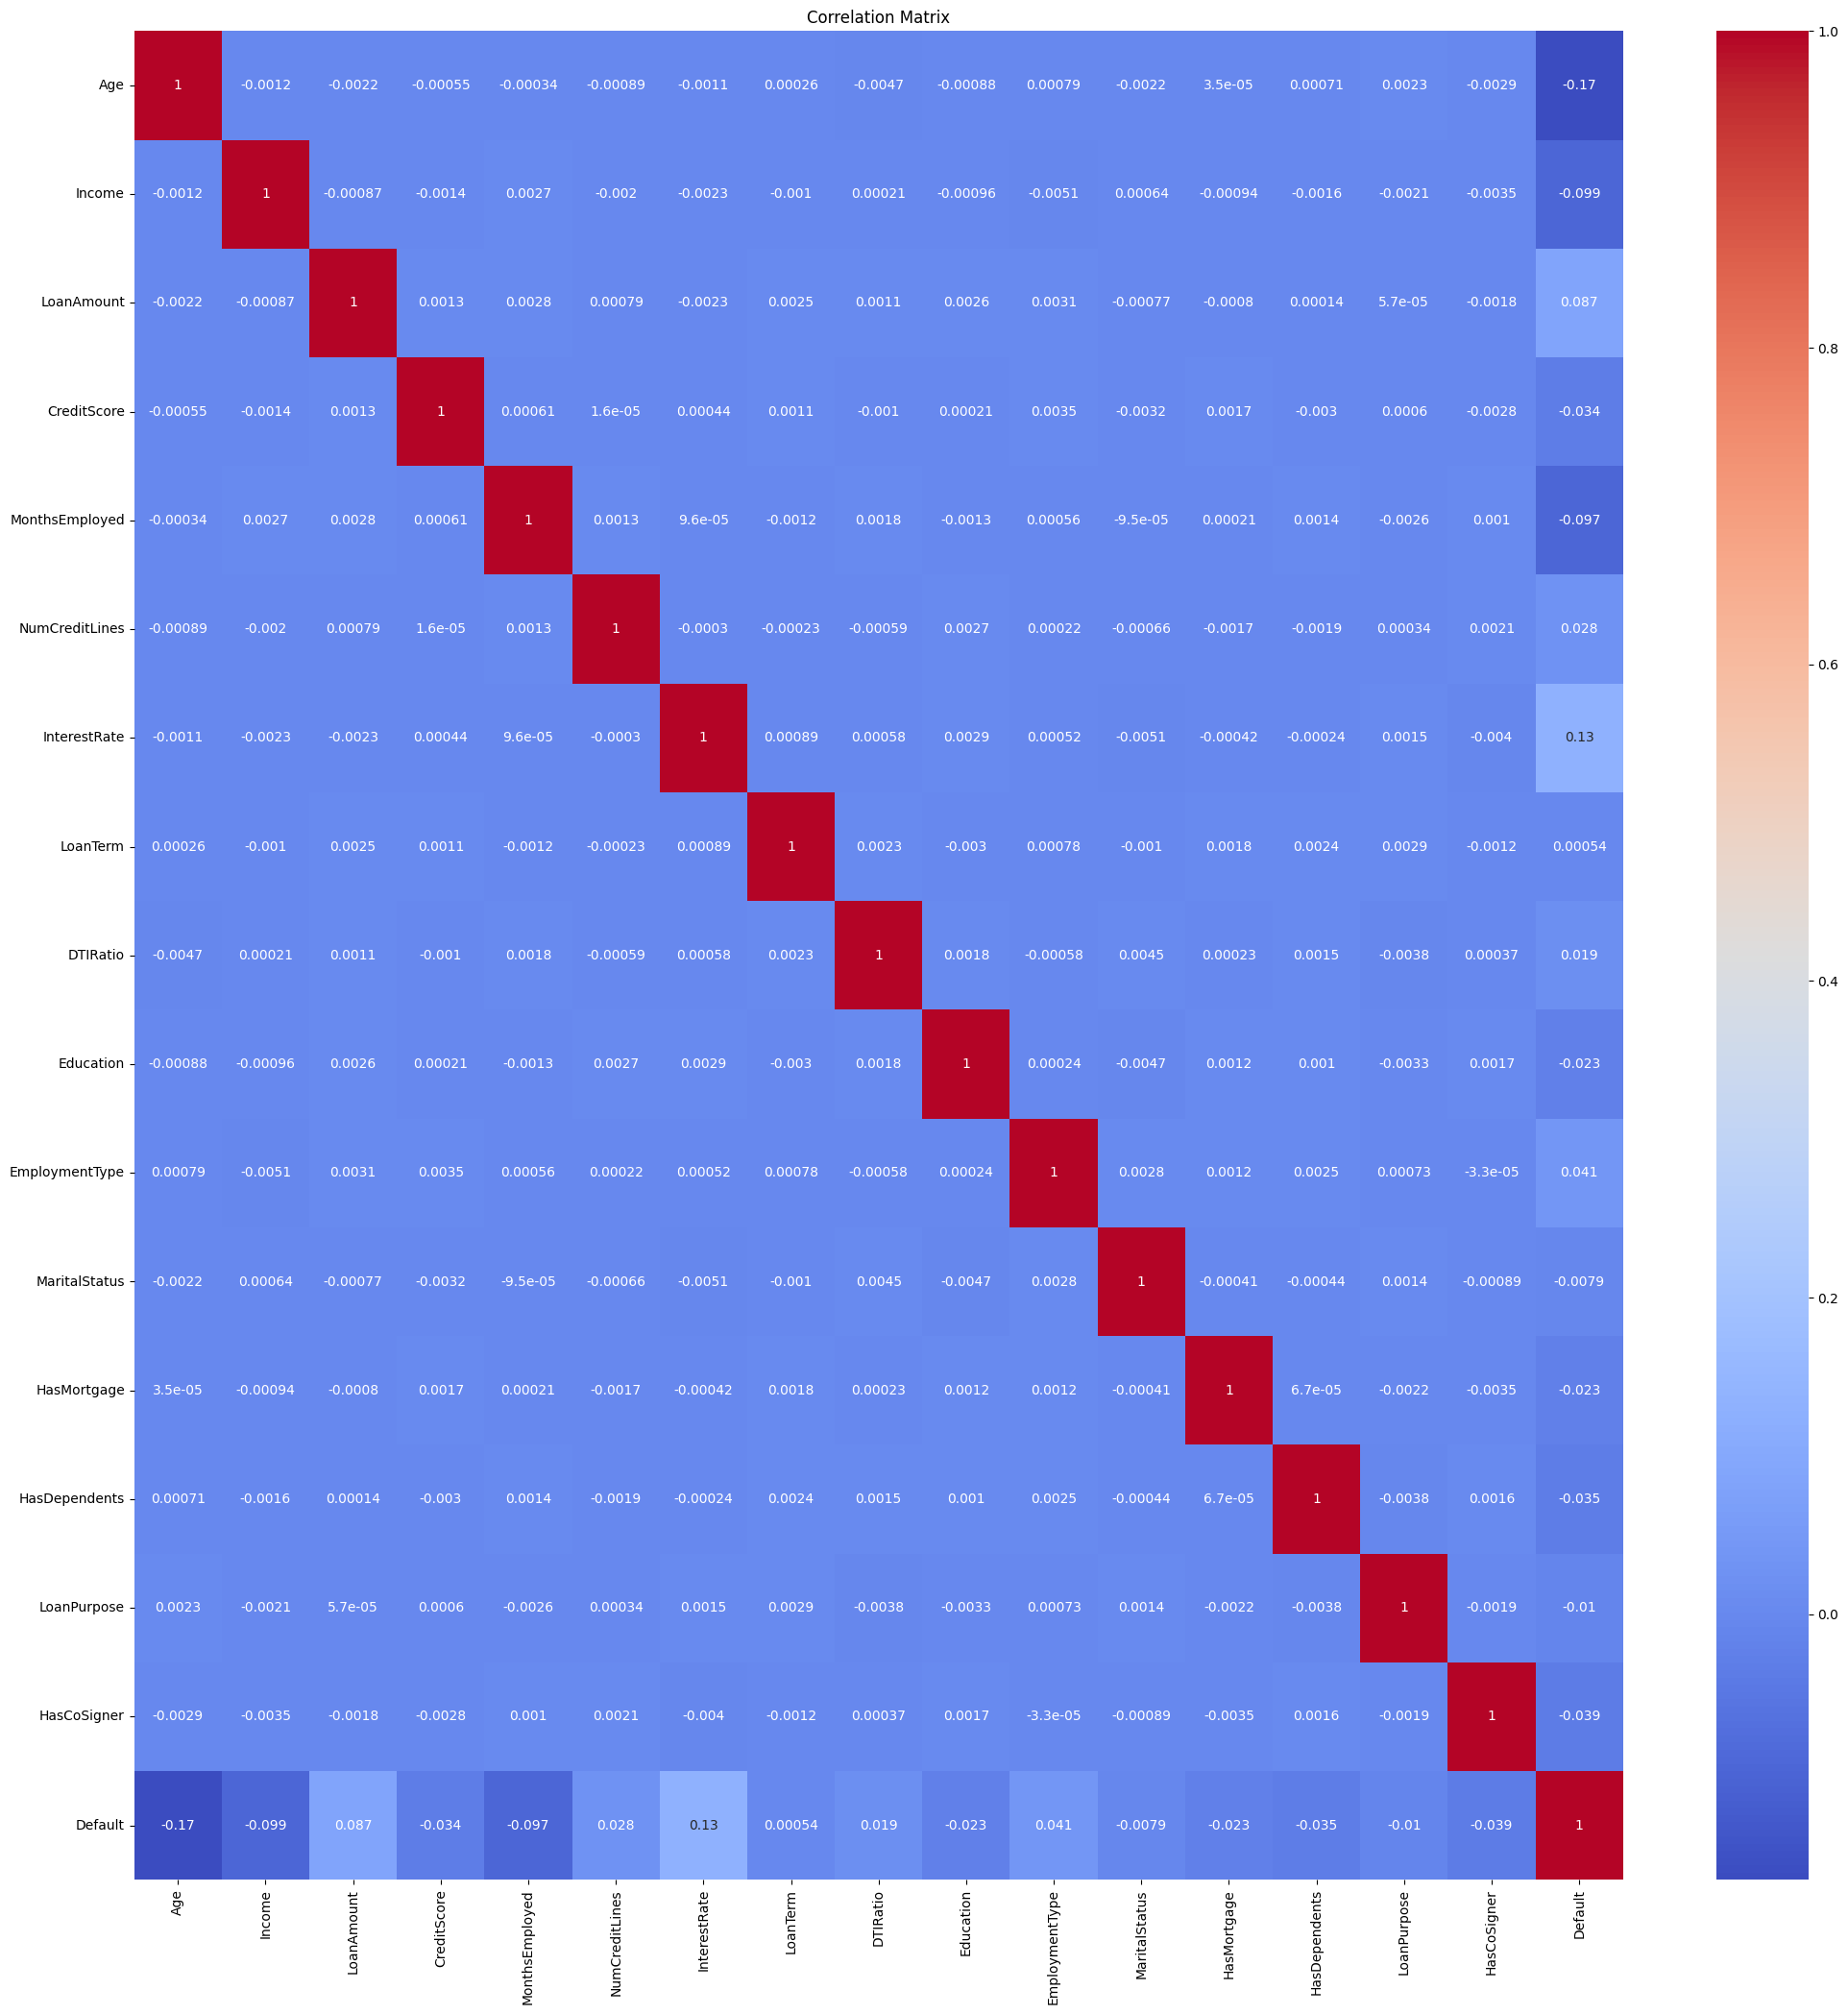

In [15]:
#To Check Correlation of The Features with the Target Feature i.e. Loan Status
corr_matrix=dataset.corr()
plt.figure(figsize=(25, 25))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()
best_features=corr_matrix.index[abs(corr_matrix['Default'])>0.3]


Balancing the dataset

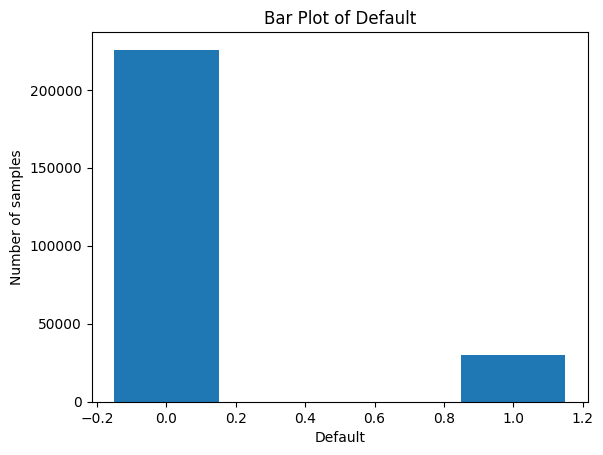

In [16]:
#plotting the target variable
target = 'Default'
class_counts = dataset[target].value_counts()
plt.bar([0,1], class_counts.values,width=0.3)
plt.title('Bar Plot of ' + target)
plt.xlabel(target)
plt.ylabel('Number of samples')
plt.show()

In [17]:
# OVER-sample the majority class
majority_class = class_counts.idxmax()
n_samples = class_counts[majority_class]
over_sampled_dataset = dataset.groupby('Default').apply(lambda x: x.sample(n_samples, replace=True)).reset_index(drop=True)

C:\Users\202207760\AppData\Local\Temp\ipykernel_15800\2014451423.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  over_sampled_dataset = dataset.groupby('Default').apply(lambda x: x.sample(n_samples, replace=True)).reset_index(drop=True)


In [18]:
print('Original dataset shape is',dataset.shape)
print('over sampled dataset shape is ',over_sampled_dataset.shape)

Original dataset shape is (255347, 17)
over sampled dataset shape is  (451388, 17)


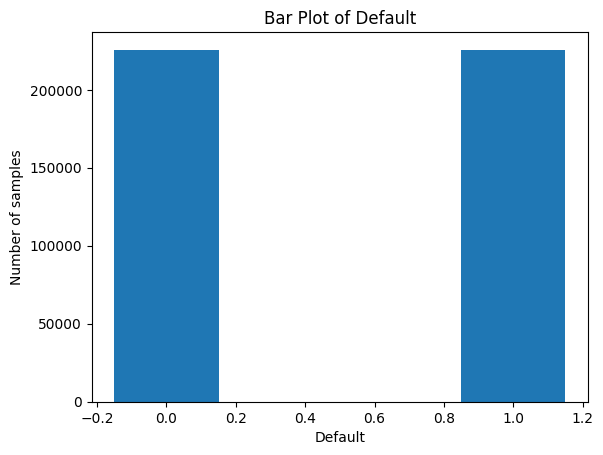

In [19]:
class_counts = over_sampled_dataset[target].value_counts()
plt.bar([0,1], class_counts.values,width=0.3)
plt.title('Bar Plot of ' + target)
plt.xlabel(target)
plt.ylabel('Number of samples')
plt.show()

Distribution of Data

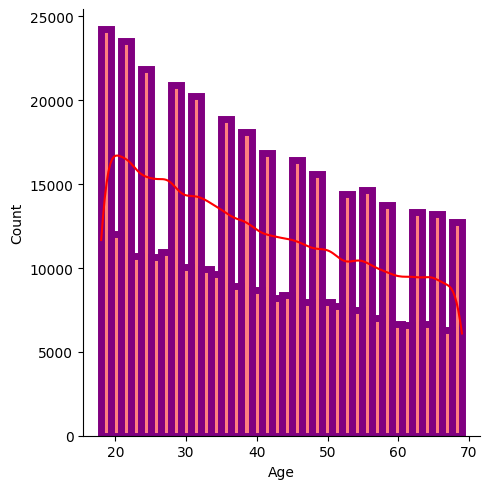

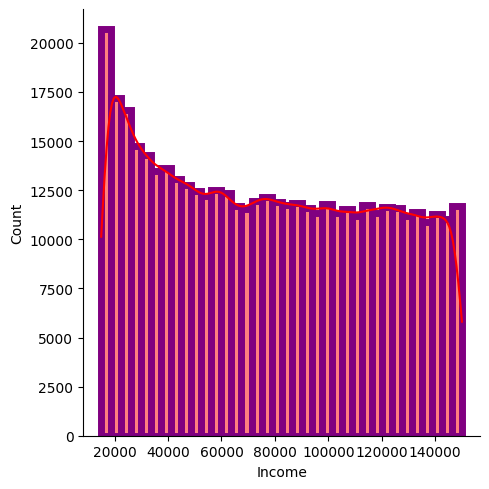

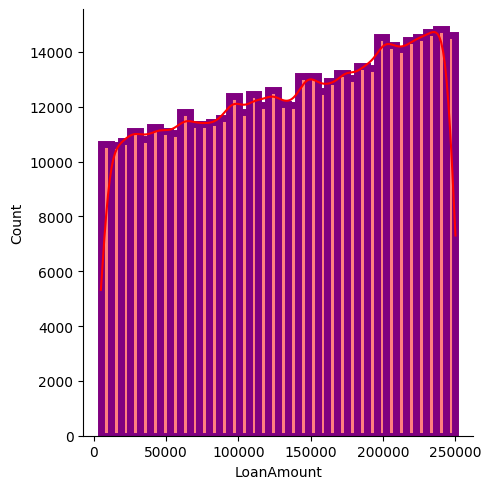

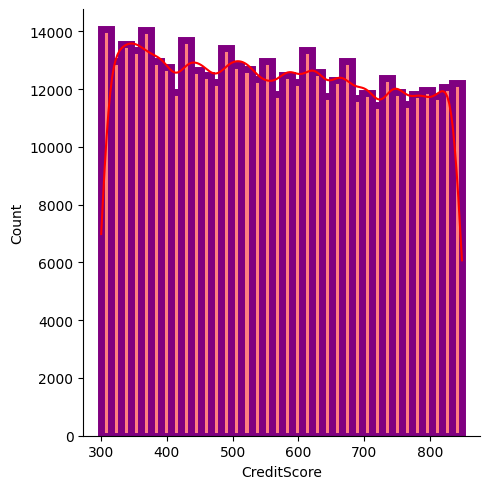

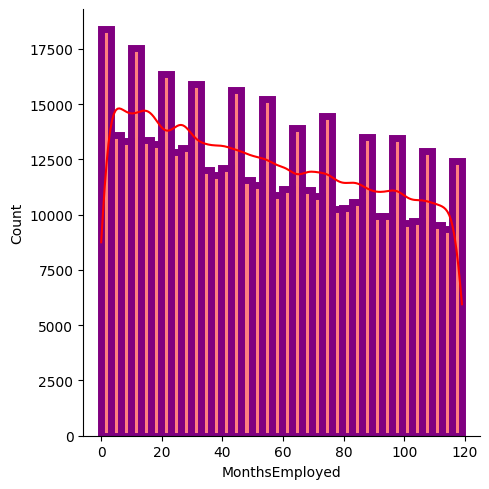

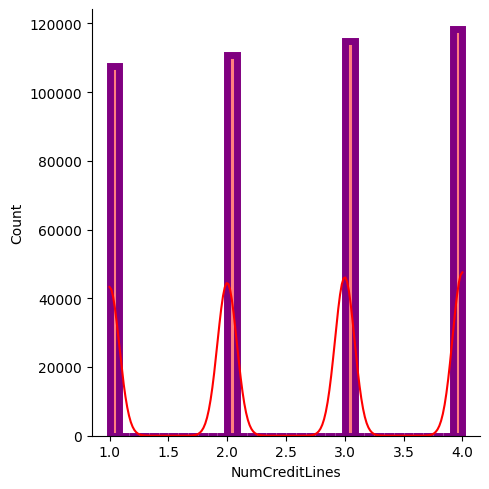

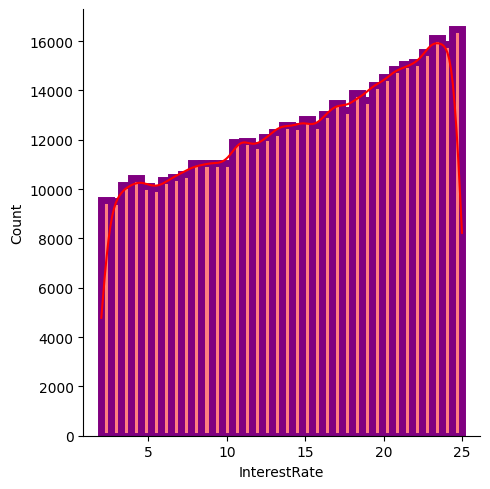

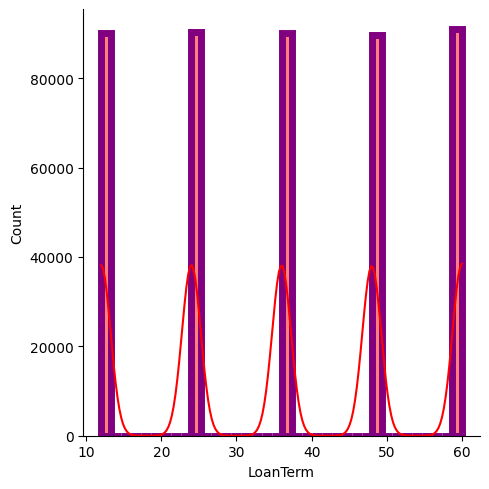

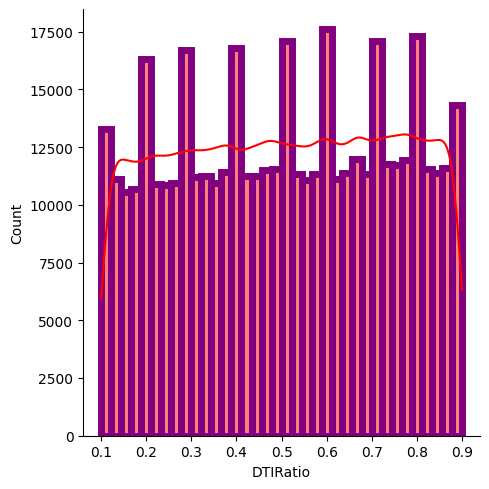

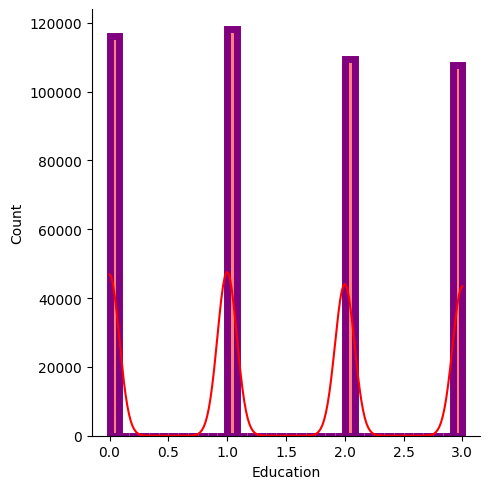

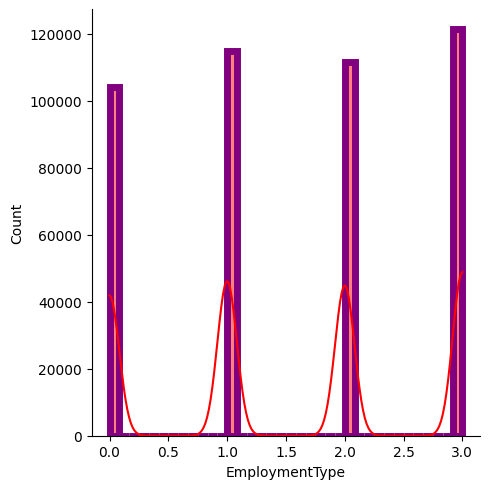

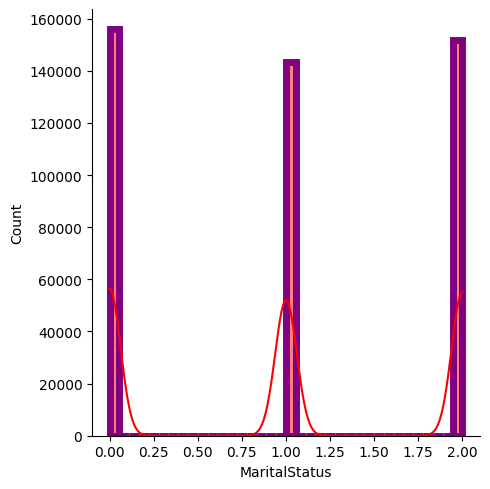

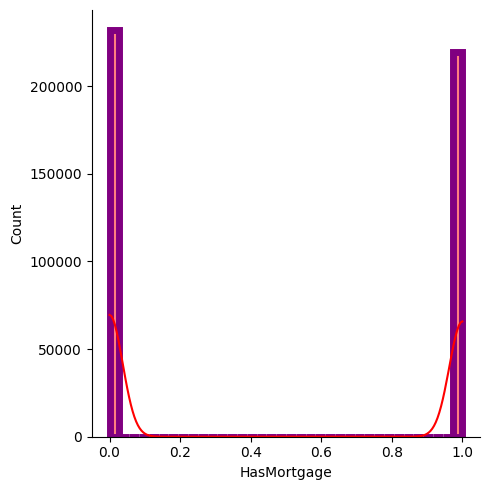

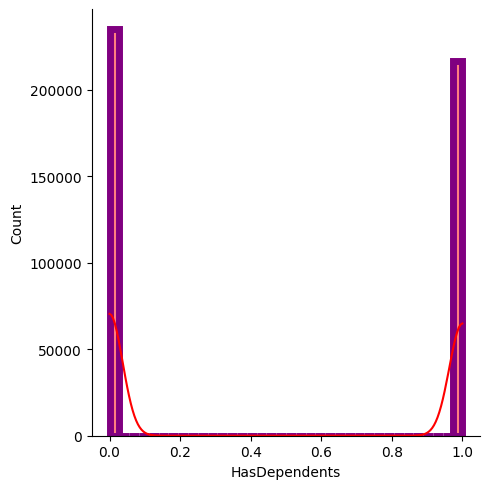

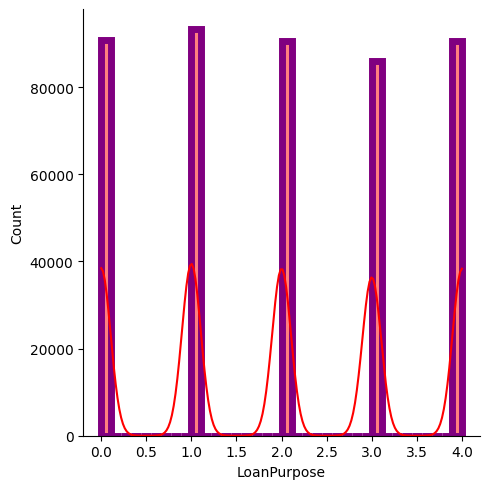

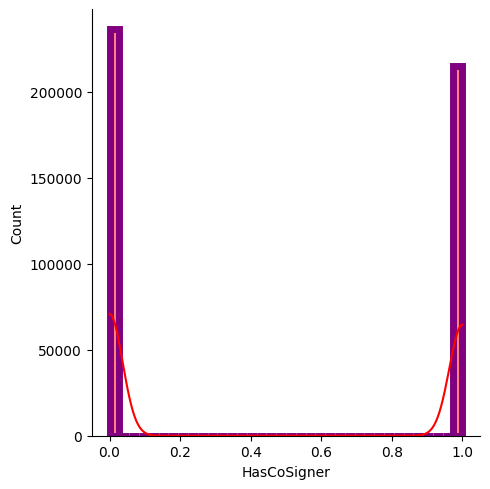

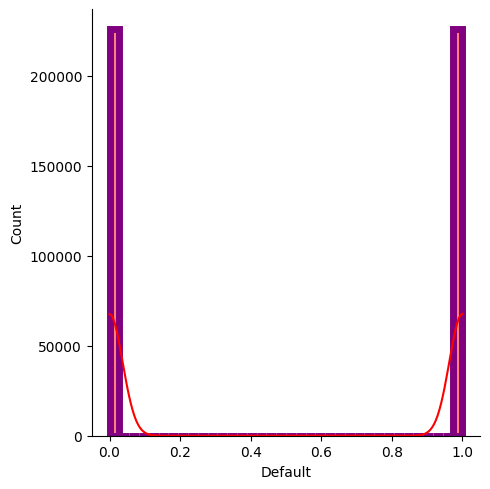

In [20]:
# Distribution
columns=over_sampled_dataset.columns.tolist()
for column in over_sampled_dataset:
  sns.displot(over_sampled_dataset[columns], kde=True, x=column, color="red", edgecolor="purple", linewidth=5, bins=int(180/5))


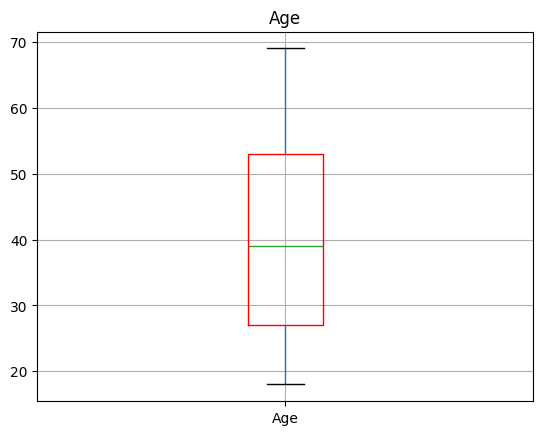

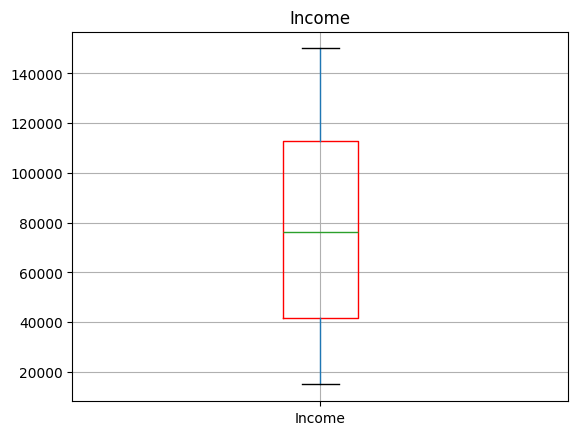

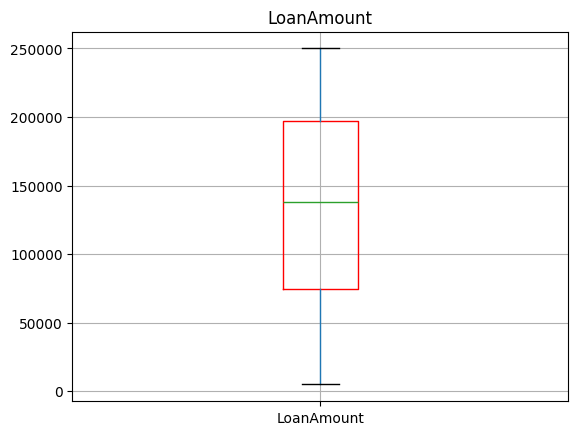

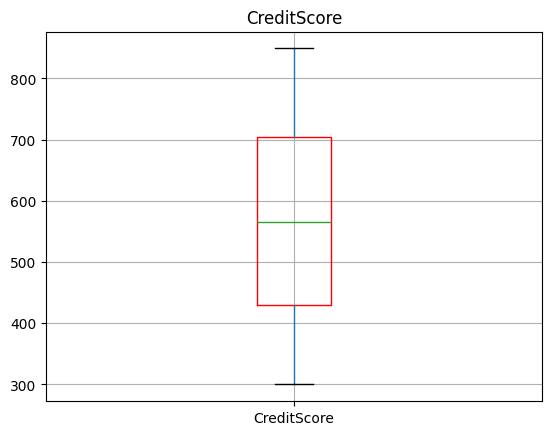

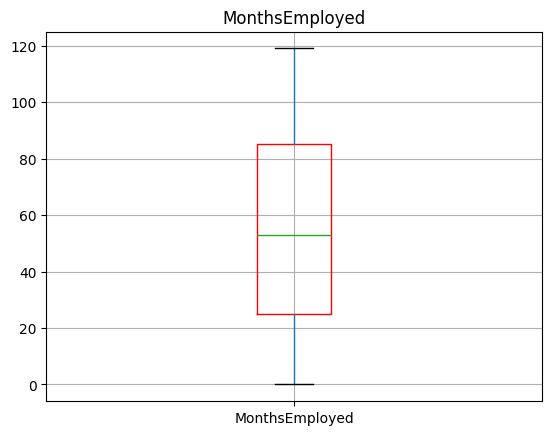

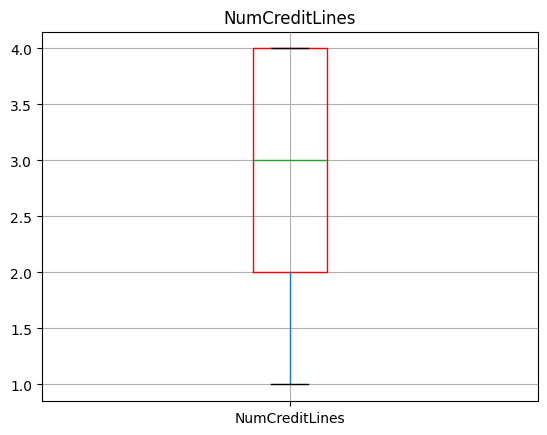

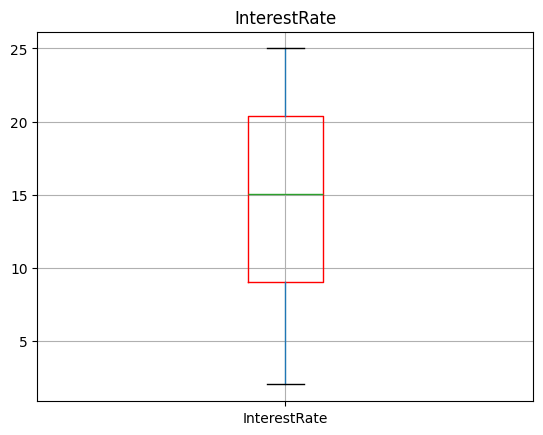

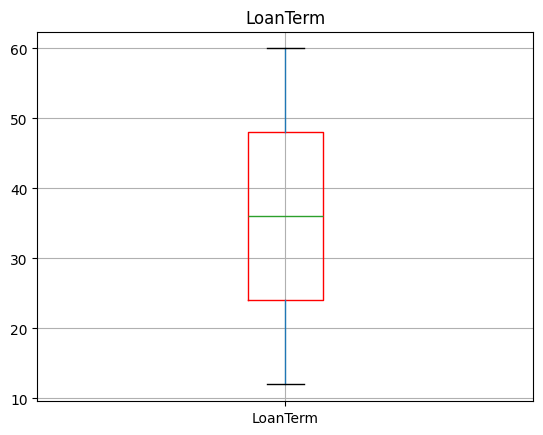

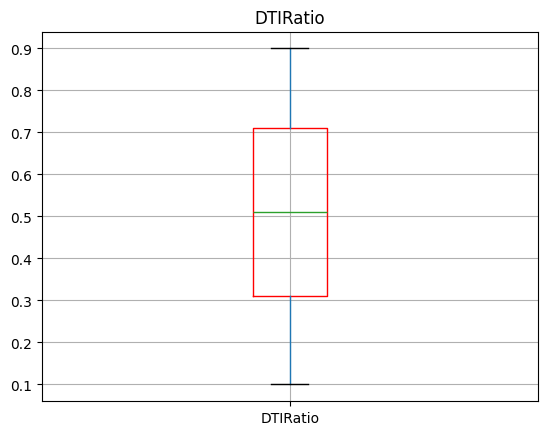

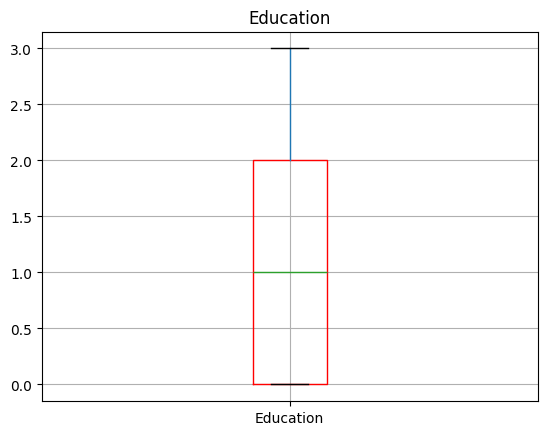

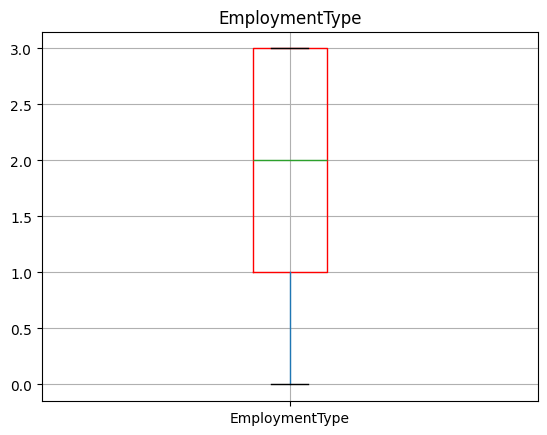

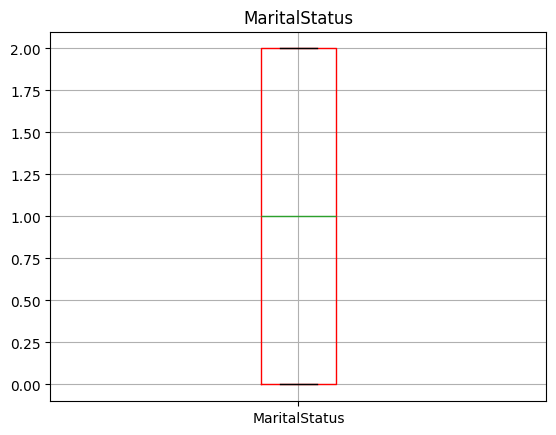

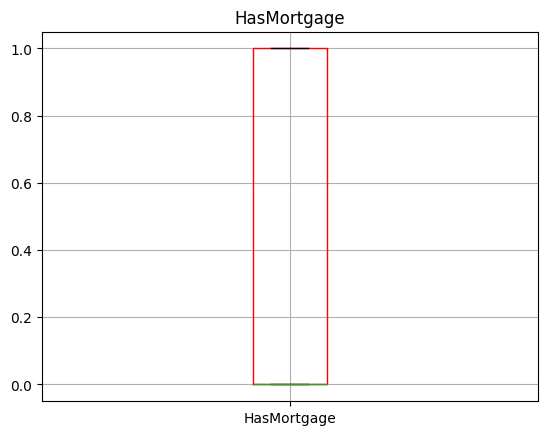

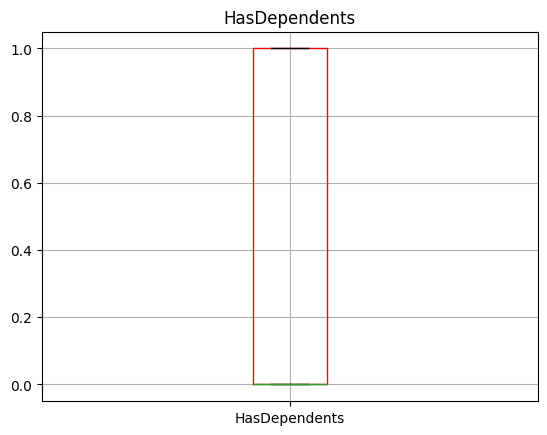

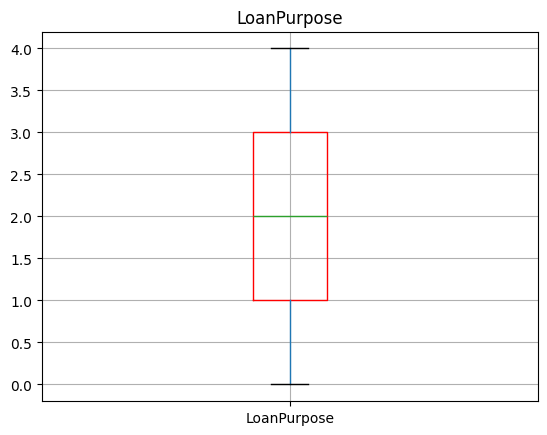

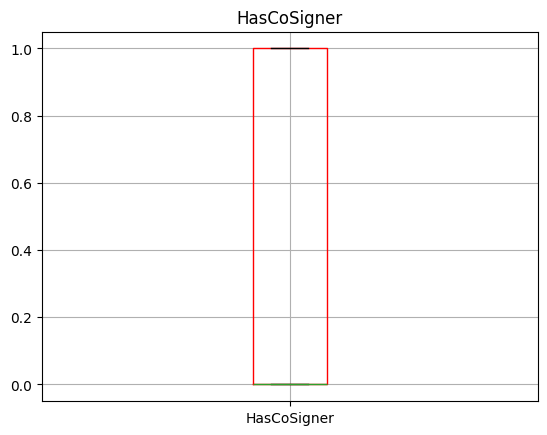

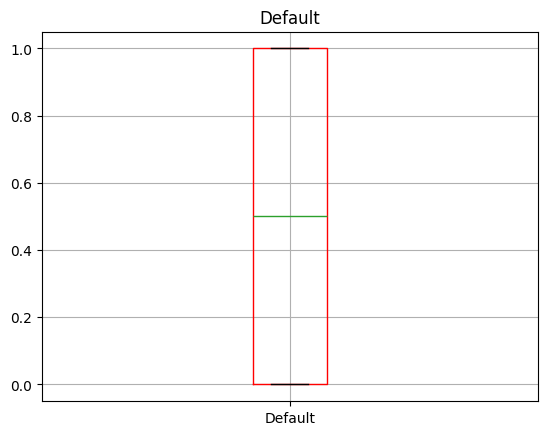

In [21]:
# BOX PLOT:
for column in dataset:
    over_sampled_dataset[[column]].boxplot(boxprops=dict(color='red'))
    plt.title(column)
    plt.show()

In [22]:
#Splitting X and y 
X = over_sampled_dataset.iloc[:, :-1]  
y = over_sampled_dataset.iloc[:, -1]  

Removing Outliers through IQR Method

In [23]:
import numpy as np

# Define the columns to check for skewness
cols = ["Age", "Income", "LoanAmount", "CreditScore", "MonthsEmployed", "NumCreditLines", "InterestRate", "LoanTerm", "DTIRatio"]

print("Skewness of ")
print("Before Removing Outliers")
for column in cols:
    print(column, dataset[column].skew())
    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 +  IQR * 1.5
    lower_limit = Q1 - IQR * 1.5
    dataset[column] = np.where(
        dataset[column] > upper_limit,
        upper_limit,
        np.where(
            dataset[column] < lower_limit,
            lower_limit,
            dataset[column]
        )
    )

# Checking Skewness of the indicated columns in cols after removing outliers
print("After Removing Outliers")
for column in cols:
    print(column, dataset[column].skew())


Skewness of 
Before Removing Outliers
Age 0.0006978543690462524
Income -0.00038051328464016167
LoanAmount -0.0018272468470878597
CreditScore 0.004688186338493831
MonthsEmployed -0.0021416836171986807
NumCreditLines -0.0002780247588620178
InterestRate 0.004607890923307074
LoanTerm -0.0021777961669722217
DTIRatio -0.001498963370252565
After Removing Outliers
Age 0.0006978543690462524
Income -0.00038051328464016167
LoanAmount -0.0018272468470878597
CreditScore 0.004688186338493831
MonthsEmployed -0.0021416836171986807
NumCreditLines -0.0002780247588620178
InterestRate 0.004607890923307074
LoanTerm -0.0021777961669722217
DTIRatio -0.001498963370252565


Box Plot after handling outliers

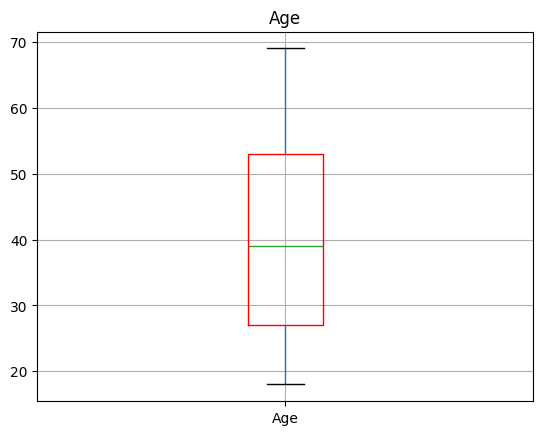

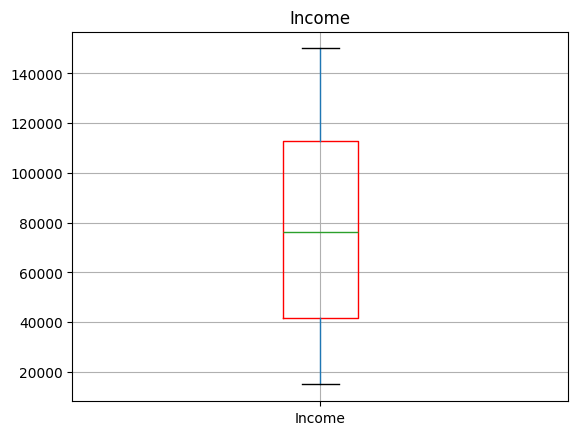

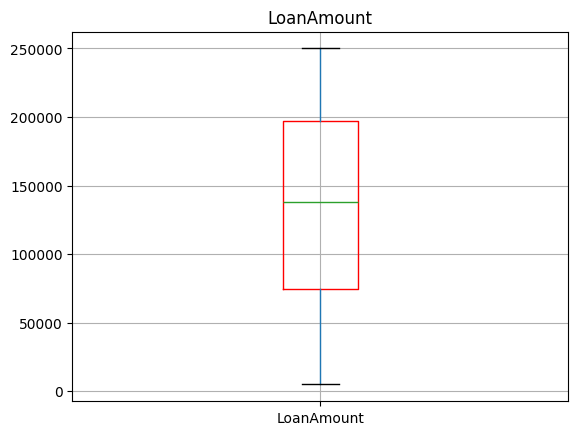

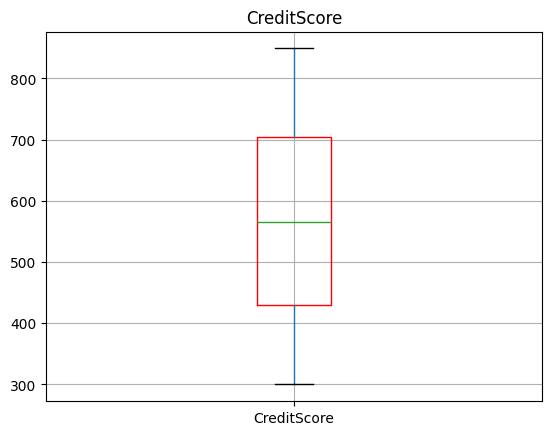

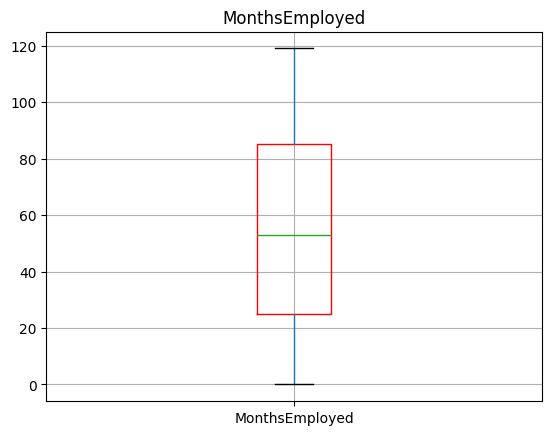

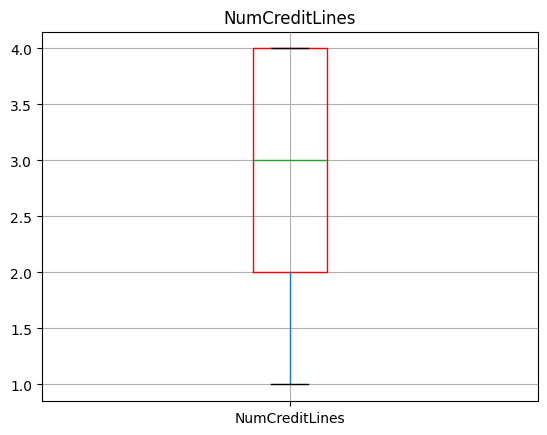

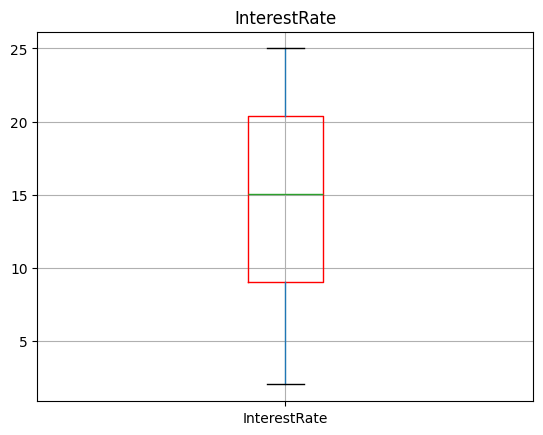

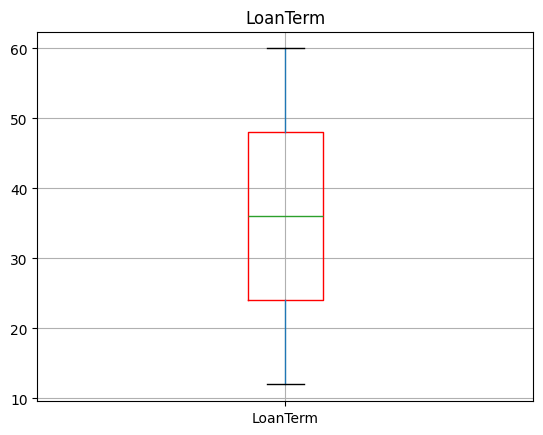

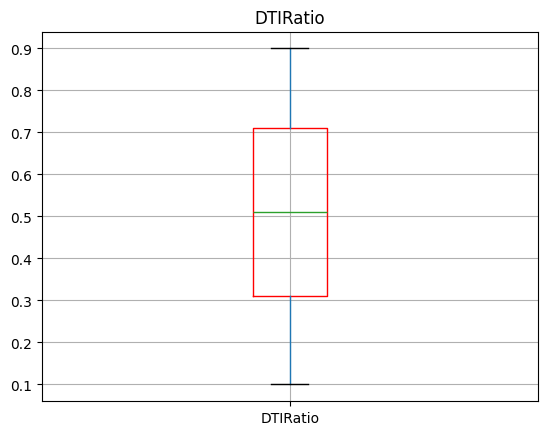

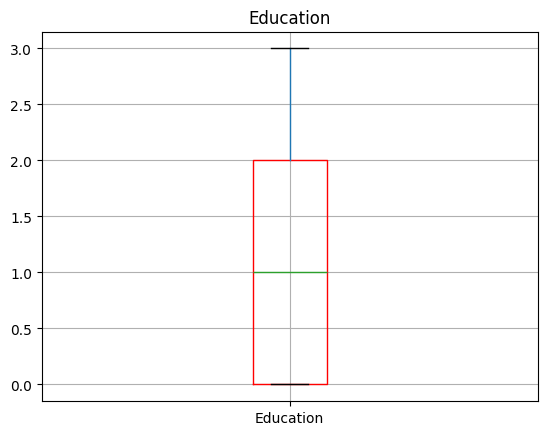

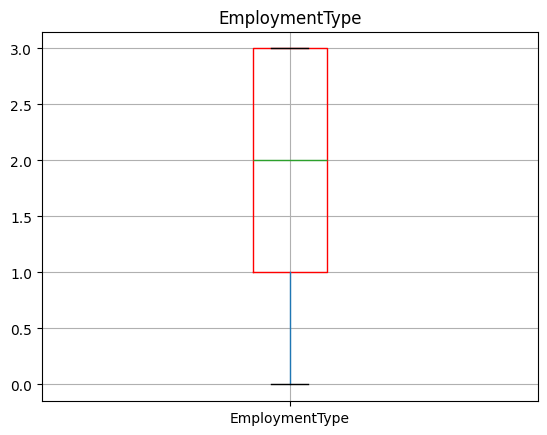

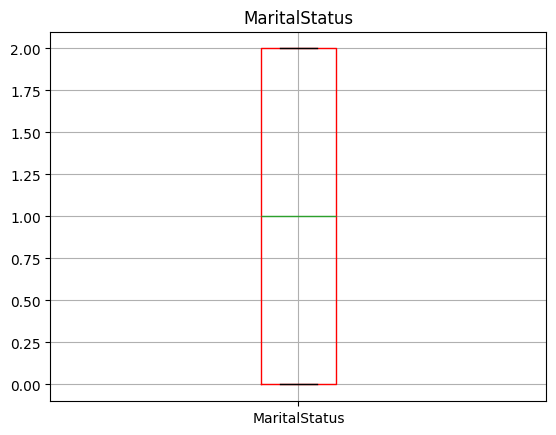

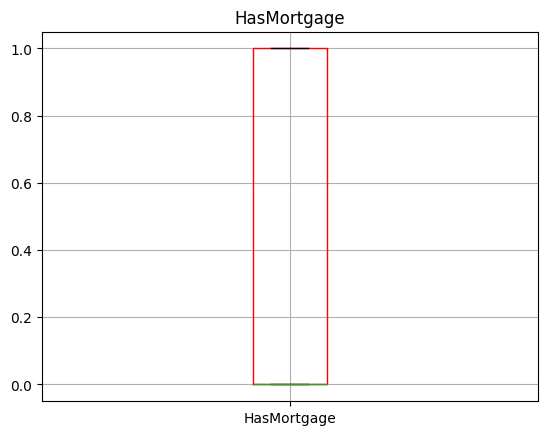

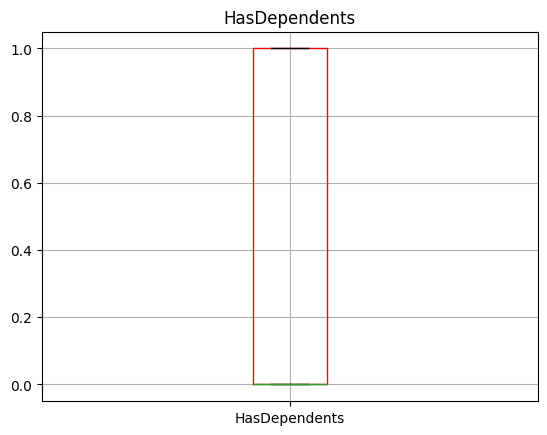

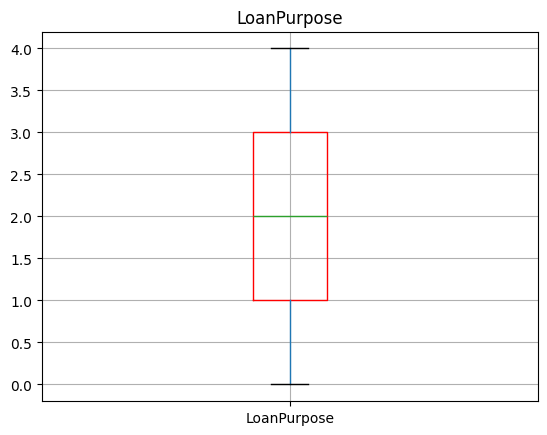

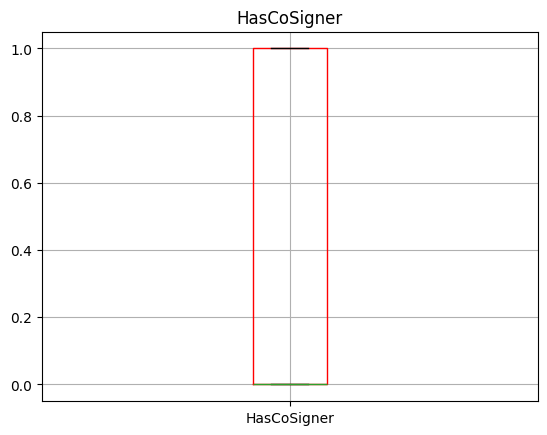

In [24]:
# BOX PLOT:
for column in X:
    X[[column]].boxplot(boxprops=dict(color='red'))
    plt.title(column)
    plt.show()

Splitting Dataset into Training and Testing Data

In [25]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3)

In [26]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score
import joblib

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=0)

# Fit the model
rf_model = rf.fit(xtrain, ytrain)

# Predict on training and test data
ypred_train = rf_model.predict(xtrain)
ypred_test = rf_model.predict(xtest)

# Print the classification report and F1 scores
print("Random Forest Classifier")
print(classification_report(ytest, ypred_test))
print(f1_score(ytest, ypred_test, average='macro'))
print(f1_score(ytest, ypred_test, average='micro'))

# Calculate and print training and testing accuracy
train_acc = accuracy_score(ytrain, ypred_train)
test_acc = accuracy_score(ytest, ypred_test)
print("Training Accuracy: ", train_acc)
print("Testing Accuracy: ", test_acc)


Random Forest Classifier
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     67866
           1       0.98      1.00      0.99     67551

    accuracy                           0.99    135417
   macro avg       0.99      0.99      0.99    135417
weighted avg       0.99      0.99      0.99    135417

0.9865000768268034
0.9865009563053383
Training Accuracy:  1.0
Testing Accuracy:  0.9865009563053383


**Random Forest Model**

In [27]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define hyperparameters to search over
hyperparameters = {
    'n_estimators': [50, 100, 200],
    'max_depth': [36, 40, 44],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]    
}
# Initialize the RandomForestClassifier
random_forest = RandomForestClassifier(random_state=42)

# Randomized Search for Random Forest:

random_search = RandomizedSearchCV(
    random_forest, 
    hyperparameters, 
    n_iter=20,  
    cv=4,  
    random_state=42,  
    n_jobs=-1 
)
# Fit the model to the training data
random_search.fit(xtrain, ytrain)
# Best parameters and score
print('Best Parameters:', random_search.best_params_)
print('Best Validation Score:', random_search.best_score_)

Best Parameters: {'n_estimators': 200, 'max_features': 'log2', 'max_depth': 40, 'criterion': 'gini', 'bootstrap': False}
Best Validation Score: 0.9822863458679408


In [28]:
# Use the best estimator from RandomizedSearchCV
Random_Forest_Model = random_search.best_estimator_

# Make predictions on the test data
ypred = Random_Forest_Model.predict(xtest)

# Print the classification report for the test data
print("Classification Report after Hyperparameter Tuning for Random Forest:")
print(classification_report(ytest, ypred))

# Optionally: Evaluate accuracy, F1-score, or other metrics
accuracy = accuracy_score(ytest, ypred)
print(f"Accuracy: {accuracy:.4f}")

Classification Report after Hyperparameter Tuning for Random Forest:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     67866
           1       0.99      1.00      0.99     67551

    accuracy                           0.99    135417
   macro avg       0.99      0.99      0.99    135417
weighted avg       0.99      0.99      0.99    135417

Accuracy: 0.9929


In [29]:
print('The hyperparameters of the final models are:')
print(Random_Forest_Model.get_params())

The hyperparameters of the final models are:
{'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 40, 'max_features': 'log2', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


Since the accuracy of Random Forest is much better than Decision Tree Model, so we have selected Random Forest as our final Model.

In [30]:
filename = 'DeploymentModel.joblib'
joblib.dump(rf, filename)

['DeploymentModel.joblib']

# ***Explainability of Random Forest***

In [31]:
from joblib import load

In [32]:
model_path = 'C:\\Users\\202207760\\Desktop\\Capstone Project webpage\\Loan-Default-Predictor-main\\DeploymentModel.joblib'
model = joblib.load(model_path)

In [33]:
import lime
import lime.lime_tabular

## ***LIME***

In [34]:
# Define the feature names
feature_names = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 
                'LoanTerm', 'DTIRatio','Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage',
                'HasDependents', 'LoanPurpose', 'HasCoSigner']

# Initialize the LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    xtrain.values,  # Convert xtrain to numpy array
    feature_names=feature_names,
    class_names=['Class 0', 'Class 1'],
    discretize_continuous=False  # Change based on your data type
)

i = 5 

# Explain the selected instance
exp = explainer.explain_instance(
    xtest.iloc[i].values,  
    model.predict_proba,    
    num_features=10         
)
exp.show_in_notebook(show_table=True)

c:\Users\202207760\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
